In [33]:
import serial
import time

serial_port = '/dev/cu.usbmodem13301'
ser = serial.Serial(serial_port, 38400)
value = []

check = input()
start_time = time.time()

while(1):
  
  if ser.readable():
    tem = ser.readline()
    val = tem.decode()
    l = list(val.split(','))
    l[-1] = l[-1].rstrip()
    l.append(float(time.time() - start_time))
    print(l)
    value.append(l)

['0.00', '0.00', '0.00', 0.00023603439331054688]
['0.00', '0.00', '0.00', 0.0005869865417480469]
['0.00', '0.00', '0.00', 0.0006301403045654297]
['0.00', '0.00', '0.00', 0.0006699562072753906]
['0.00', '0.00', '0.00', 0.0007100105285644531]
['0.00', '0.00', '0.00', 0.0007498264312744141]
['0.00', '0.00', '0.00', 0.0007901191711425781]
['0.00', '0.00', '0.00', 0.01888895034790039]
['0.00', '0.00', '0.00', 0.08443593978881836]
['0.00', '0.00', '0.00', 0.1459369659423828]
['0.00', '0.00', '0.00', 0.21141886711120605]
['0.00', '0.00', '0.00', 0.27291393280029297]
['0.00', '0.00', '0.00', 0.3388559818267822]
['0.00', '0.00', '0.00', 0.3998751640319824]
['0.00', '0.00', '0.00', 0.4654049873352051]
['0.00', '0.00', '0.00', 0.5309140682220459]
['0.00', '0.00', '0.00', 0.5923330783843994]
['0.00', '0.00', '0.00', 0.6578800678253174]
['0.00', '0.00', '0.00', 0.7194619178771973]
['0.00', '0.00', '0.00', 0.7848467826843262]
['0.00', '0.00', '0.00', 0.8464021682739258]
['0.00', '0.00', '0.00', 0.91

KeyboardInterrupt: 

In [34]:
import pandas as pd

df = pd.DataFrame(value, columns=["Roll", "Pitch", "Yaw", "Time"])
df = df.dropna()
df = df.astype(float)
df['Time'] = df['Time'].apply(lambda x: round(x, 4))

file_name = input()
df.to_csv("../data/" + file_name + ".csv", encoding='utf-8', index=False)

----------------------------------------------------------------------------------------------------

In [36]:
df
# df['Time'].plot()

,Roll,Pitch,Yaw,Time
0,0.0,0.0,0.0,0.0002
1,0.0,0.0,0.0,0.0006
2,0.0,0.0,0.0,0.0006
3,0.0,0.0,0.0,0.0007
4,0.0,0.0,0.0,0.0007
...,...,...,...,...
186,0.0,0.0,0.0,11.4298
187,0.0,0.0,0.0,11.4952
188,0.0,0.0,0.0,11.5568
189,0.0,0.0,0.0,11.6222


In [14]:
import pandas as pd
df1 = pd.read_csv('../data/230118_oj_rpy.csv')
df2 = pd.read_csv('../data/230118_mj_slow_walk.csv')
df = pd.read_csv('../data/230118_mj_strong_walk.csv')

In [10]:
import matplotlib.pyplot as plt

def draw_plot(df, name):
    x = df['Time']
    
    f, axes = plt.subplots(3,1)
    # 격자 크기 설정
    f.set_size_inches((10, 10))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    plt.title(name + "'s Gait")

    axes[0].plot(x, df['Roll'])
    axes[0].set_title('Roll')
    
    axes[1].plot(x, df['Pitch'])
    axes[1].set_title('Pitch')

    axes[2].plot(x, df['Yaw'])
    axes[2].set_title('Yaw')

    plt.show()

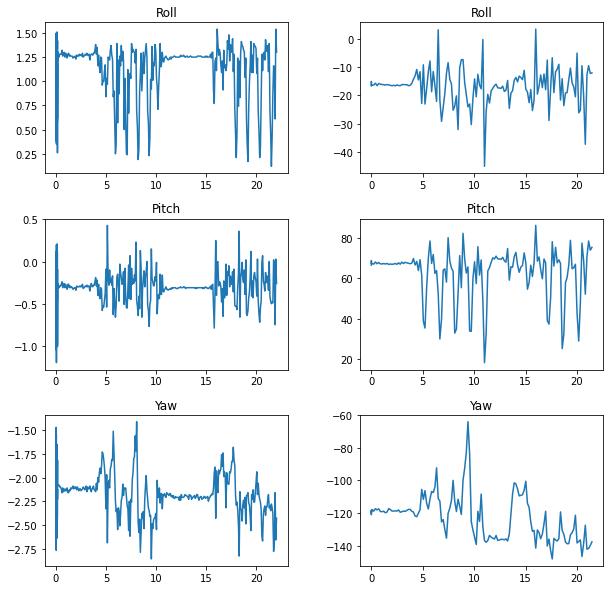

In [8]:


fast_x = df['Time']
slow_x = df1['Time']

f, axes = plt.subplots(3,2)
# 격자 크기 설정
f.set_size_inches((10, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

plt.title("Fast Walk vs Slow Walk")

axes[0, 0].plot(fast_x, df['Roll'])
axes[0, 0].set_title('Roll')

axes[1, 0].plot(fast_x, df['Pitch'])
axes[1, 0].set_title('Pitch')

axes[2, 0].plot(fast_x, df['Yaw'])
axes[2, 0].set_title('Yaw')



axes[0, 1].plot(slow_x, df1['Roll'])
axes[0, 1].set_title('Roll')

axes[1, 1].plot(slow_x, df1['Pitch'])
axes[1, 1].set_title('Pitch')

axes[2, 1].plot(slow_x, df1['Yaw'])
axes[2, 1].set_title('Yaw')


plt.show()

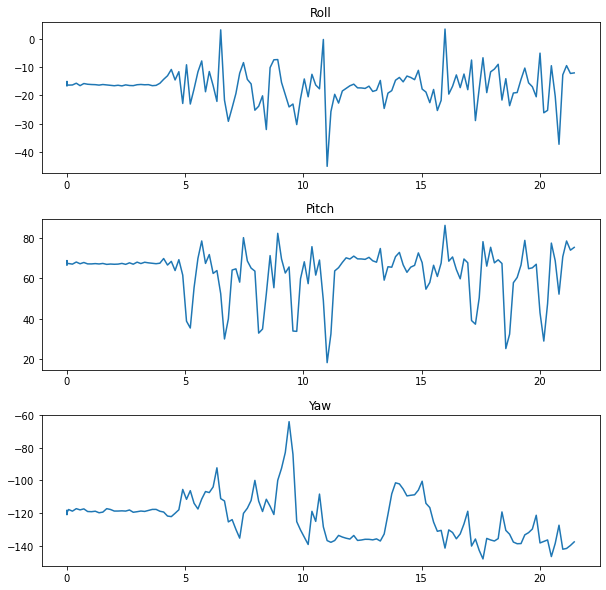

In [34]:
draw_plot(df1, "z")

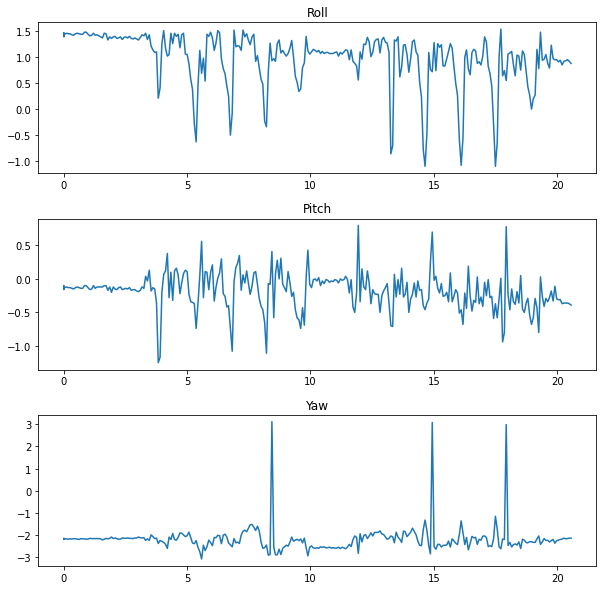

In [15]:
draw_plot(df, "z")

In [53]:
from scipy.stats import norm

df2 = df[df.columns.difference(['Time'])]
df2 = df2.apply(lambda x: norm.pdf(x))
df2['Time'] = df['Time']

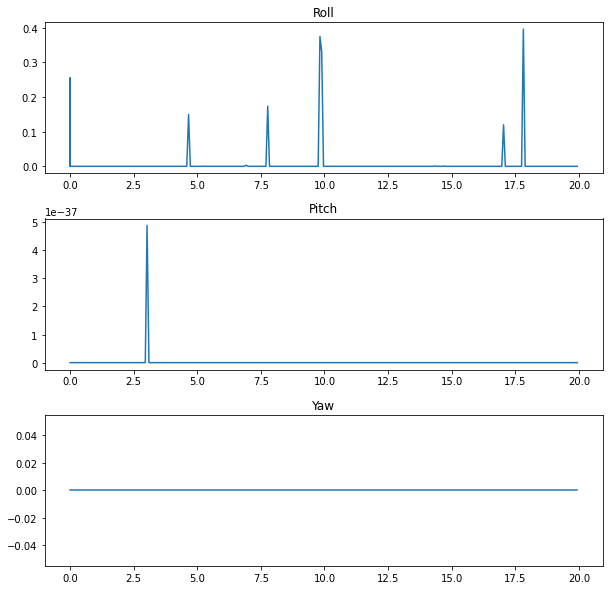

In [54]:
draw_plot(df2, "df2")